# Introdução
Este projeto tem como objetivo realizar uma análise exploratória de dados de clientes, com foco em entender seu perfil demográfico, comportamento de gastos e histórico de pagamentos, buscando identificar padrões relevantes associados ao risco de inadimplência.

A análise foi conduzida utilizando Python, com apoio das bibliotecas Pandas para manipulação e limpeza dos dados e Matplotlib para visualização. O processo inclui uma etapa inicial de exploração dos dados, seguida de tratamento de inconsistências e valores atípicos, e posteriormente uma análise exploratória orientada por perguntas de negócio.

O objetivo final é extrair insights claros e comunicáveis, capazes de apoiar tomadas de decisão relacionadas à avaliação de risco e ao entendimento do comportamento financeiro dos clientes.

## Importando as Bibliotecas Necessárias

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Conjunto de Dados
* O conjunto de dados contém informações como idade, sexo, nível educacional, estado civil, limite de crédito, valores gastos ao longo de meses consecutivos e o status de pagamento em períodos anteriores. Cada linha representa um cliente, permitindo análises tanto individuais quanto agregadas.

## 1. Data Cleaning
    Nesta etapa, os dados foram avaliados e tratados com o objetivo de garantir consistência, confiabilidade e adequação para a análise exploratória subsequente.
    As principais ações realizadas foram:

* Verificação e correção de tipos de dados, assegurando que variáveis numéricas e categóricas estivessem devidamente representadas.

* Análise de valores nulos e tratamento conforme o contexto de cada variável, optando-se por manter valores ausentes quando sua remoção ou imputação poderia introduzir viés artificial.

* Identificação de valores extremos, os quais foram analisados individualmente para verificar se representavam erros de registro ou observações válidas do comportamento dos clientes.

* Padronização de valores categóricos, reduzindo inconsistências de nomenclatura e facilitando análises agregadas.

* Validação das variáveis relacionadas ao histórico de pagamento, garantindo que os valores estivessem dentro do domínio documentado do dataset.

In [52]:
cd = pd.read_csv("UCI_Credit_Card.csv", sep = ",")

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
cd.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [55]:
cd.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [56]:
cd.shape

(30000, 25)

In [57]:
cd.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [58]:
cd["SEX"].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [59]:
cd["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [60]:
cd["EDUCATION"] = cd["EDUCATION"].replace(to_replace=[5, 6, 0], value = 4)

In [61]:
cd["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [62]:
cd["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [63]:
cd["MARRIAGE"] = cd["MARRIAGE"].replace(to_replace=[0], value = 3)

In [64]:
cd["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [65]:
cd["AGE"].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
57     122
58     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
71       3
72       3
79       1
74       1
Name: count, dtype: int64

In [66]:
cd["PAY_0"].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [67]:
cd["PAY_2"].value_counts()

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

In [68]:
cd["PAY_3"].value_counts()

PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

In [69]:
cd["PAY_4"].value_counts()

PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

In [70]:
cd["PAY_5"].value_counts()

PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64

In [71]:
cd["PAY_6"].value_counts()

PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64

In [72]:
cd.loc[cd["AGE"] < 0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [73]:
cd["AGE"].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
57     122
58     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
71       3
72       3
79       1
74       1
Name: count, dtype: int64

In [74]:
cd.loc[cd["LIMIT_BAL"] < 0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [75]:
cd["LIMIT_BAL"].max()

1000000.0

In [76]:
cd.loc[cd["LIMIT_BAL"] == 1000000]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,0,0,964511.0,983931.0,535020.0,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


In [77]:
condicao = (cd[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6" ]] < 0).any(axis=1)

In [78]:
cd.loc[condicao]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
26,27,60000.0,1,1,2,27,1,-2,-1,-1,-1,-1,-109.0,-425.0,259.0,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
35,36,160000.0,1,1,2,30,-1,-1,-2,-2,-2,-1,30265.0,-131.0,-527.0,-923.0,-1488.0,-1884.0,131.0,396.0,396.0,565.0,792.0,0.0,0
37,38,60000.0,2,2,2,22,0,0,0,0,0,-1,15054.0,9806.0,11068.0,6026.0,-28335.0,18660.0,1500.0,1518.0,2043.0,0.0,47671.0,617.0,0
56,57,180000.0,2,3,1,34,0,0,0,-1,-1,-1,16386.0,15793.0,8441.0,7142.0,-679.0,8321.0,8500.0,1500.0,7500.0,679.0,9000.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29931,29932,60000.0,1,2,3,41,0,0,0,0,0,0,61118.0,50643.0,44004.0,26940.0,9971.0,-11798.0,2200.0,2000.0,1200.0,0.0,0.0,28000.0,0
29958,29959,230000.0,1,3,2,31,0,-1,-1,-1,-1,-1,4261.0,25.0,221.0,417.0,613.0,-191.0,1000.0,1000.0,1000.0,1000.0,0.0,0.0,0
29962,29963,50000.0,1,2,2,30,1,-1,2,-1,-1,-2,-264.0,264.0,264.0,7300.0,0.0,0.0,528.0,0.0,7300.0,0.0,0.0,0.0,0
29989,29990,150000.0,1,1,2,35,-1,-1,-1,-1,-1,-2,3425.0,9009.0,-3.0,780.0,0.0,0.0,9054.0,0.0,783.0,0.0,0.0,0.0,0


In [79]:
condicao.sum()

np.int64(1930)

In [80]:
bills = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
         "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]

(cd[bills] < 0).sum()

BILL_AMT1    590
BILL_AMT2    669
BILL_AMT3    655
BILL_AMT4    675
BILL_AMT5    655
BILL_AMT6    688
dtype: int64

In [81]:
condicao_payamt = (cd[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6" ]] < 0).any(axis=1)

In [82]:
cd.loc[condicao_payamt]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [83]:
condicao_payamt_max = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6" ]
(cd[condicao_payamt_max]).max()

PAY_AMT1     873552.0
PAY_AMT2    1684259.0
PAY_AMT3     896040.0
PAY_AMT4     621000.0
PAY_AMT5     426529.0
PAY_AMT6     528666.0
dtype: float64

## 2. EDA — Análise Exploratória

In [84]:
inadimplencia_por_sexo = (
    cd
    .groupby("SEX")["default.payment.next.month"]
    .mean()
)
print(inadimplencia_por_sexo)

SEX
1    0.241672
2    0.207763
Name: default.payment.next.month, dtype: float64


In [85]:
inadimplencia_por_educacao = (
    cd
    .groupby("EDUCATION")["default.payment.next.month"]
    .mean()
)
print(inadimplencia_por_educacao)

EDUCATION
1    0.192348
2    0.237349
3    0.251576
4    0.070513
Name: default.payment.next.month, dtype: float64


In [86]:
inadimplencia_por_casado = (
    cd
    .groupby("MARRIAGE")["default.payment.next.month"]
    .mean()
)
print(inadimplencia_por_casado)

MARRIAGE
1    0.234717
2    0.209283
3    0.236074
Name: default.payment.next.month, dtype: float64


In [87]:
inadimplencia_por_idade = (
    cd
    .groupby("AGE")["default.payment.next.month"]
    .mean()
)
print(inadimplencia_por_idade)

AGE
21    0.208955
22    0.301786
23    0.265306
24    0.266193
25    0.254637
26    0.201433
27    0.211916
28    0.202981
29    0.195016
30    0.196416
31    0.188168
32    0.194301
33    0.187609
34    0.198795
35    0.203055
36    0.229242
37    0.219981
38    0.205508
39    0.208595
40    0.214943
41    0.224515
42    0.232997
43    0.223881
44    0.231429
45    0.188006
46    0.275439
47    0.239521
48    0.223176
49    0.263274
50    0.245742
51    0.258824
52    0.256579
53    0.227692
54    0.226721
55    0.272727
56    0.275281
57    0.221311
58    0.254098
59    0.253012
60    0.343284
61    0.375000
62    0.159091
63    0.258065
64    0.290323
65    0.208333
66    0.280000
67    0.312500
68    0.200000
69    0.200000
70    0.200000
71    0.000000
72    0.333333
73    0.750000
74    0.000000
75    0.333333
79    0.000000
Name: default.payment.next.month, dtype: float64


In [88]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ["20 - 30", "31 - 40", "41 - 50", "51 - 60", "61 - 70", "71+"]

In [89]:
cd["Age_Range"] = pd.cut(cd["AGE"], bins=bins, labels=labels, right=False)

In [90]:
inadimplencia_por_idade = (
    cd
    .groupby("Age_Range", observed = True)["default.payment.next.month"]
    .mean()
)
print(inadimplencia_por_idade)

Age_Range
20 - 30    0.228426
31 - 40    0.202527
41 - 50    0.229734
51 - 60    0.248612
61 - 70    0.283439
71+        0.280000
Name: default.payment.next.month, dtype: float64


* Agrupamentos por faixas etárias consideram apenas categorias observadas no conjunto de dados.

In [91]:
cd["LIMIT_BAL"].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [92]:
bins = [0, 50000, 140000, 240000, cd["LIMIT_BAL"].max()]
labels = [
    "Até 50k",
    "50k até 140k",
    "140k até 240k",
    "Acima de 240k"
]

cd["Limit_Range"] = pd.cut(
    cd["LIMIT_BAL"],
    bins=bins,
    labels=labels,
    right=False
)

In [94]:
inadimplencia_por_credito = (
    cd
    .groupby("Limit_Range", observed = True)["default.payment.next.month"]
    .mean()
)e
print(inadimplencia_por_credito)

Limit_Range
Até 50k          0.360705
50k até 140k     0.253861
140k até 240k    0.178310
Acima de 240k    0.142876
Name: default.payment.next.month, dtype: float64


In [96]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.titleweight"] = "bold"

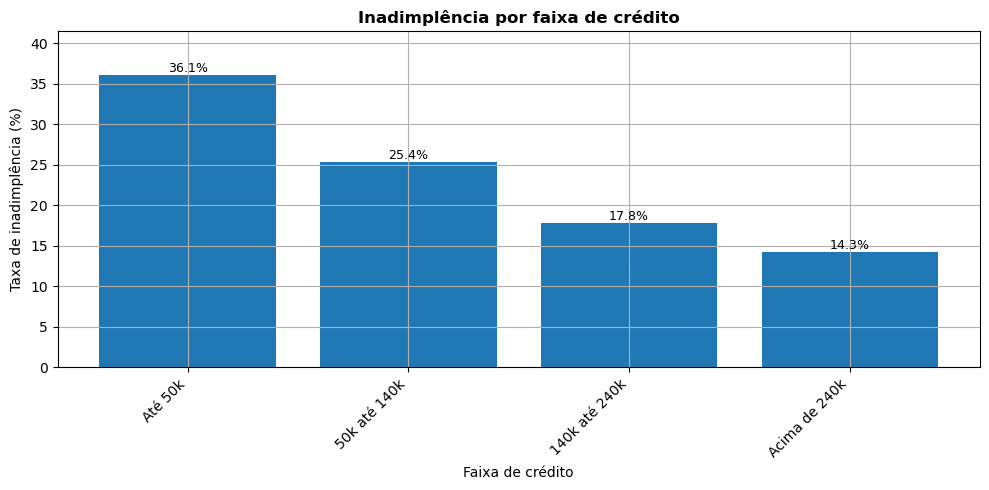

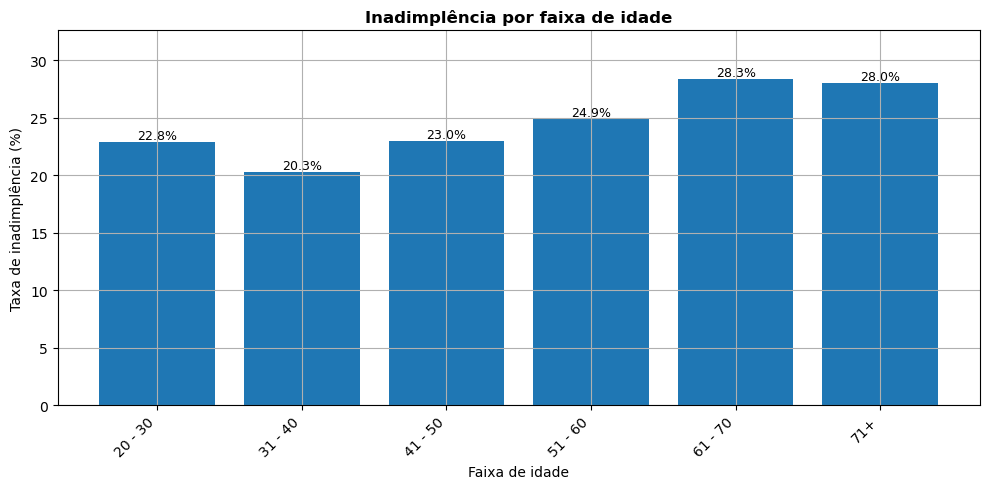

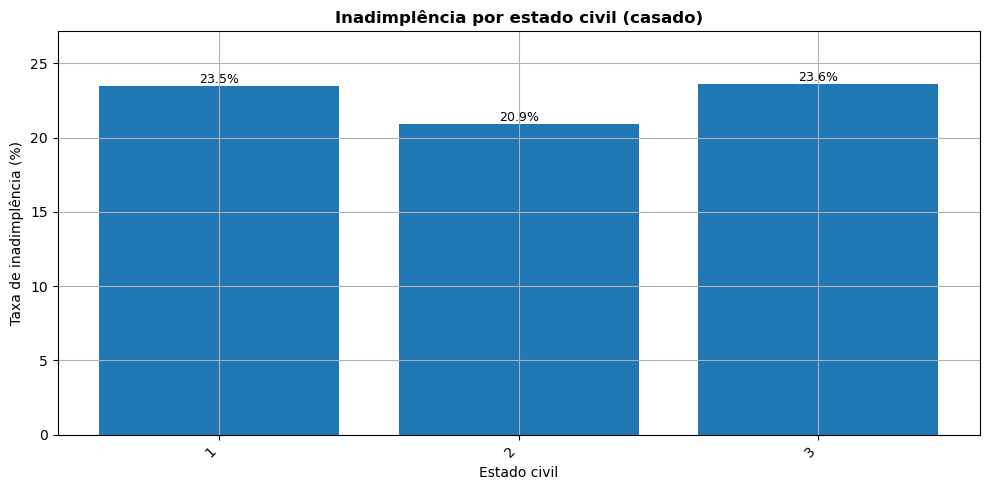

In [99]:
import matplotlib.pyplot as plt

def bar_taxa(series, titulo, xlabel):
    s = series.copy()
    s = s[~s.index.isna()]

    try:
        s = s.sort_index()
    except Exception:
        pass

    x = s.index.astype(str)
    y = s.values * 100  # em %

    plt.figure(figsize=(10, 5))
    plt.bar(x, y)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel("Taxa de inadimplência (%)")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, max(y) * 1.15 if len(y) else 1)

    for i, v in enumerate(y):
        plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()

bar_taxa(inadimplencia_por_credito, "Inadimplência por faixa de crédito", "Faixa de crédito")

bar_taxa(inadimplencia_por_idade, "Inadimplência por faixa de idade", "Faixa de idade")

bar_taxa(inadimplencia_por_casado, "Inadimplência por estado civil (casado)", "Estado civil")
